In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#CSV import in right format
df = pd.read_csv('SpeedDatingData.csv', encoding = "ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [47]:
df.shape
#8378 rows for 195 columns
#df.nunique()

(8378, 195)

In [48]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


Still 195 columns we will try to clean

In [49]:
#Let's have a look at how many values are null
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

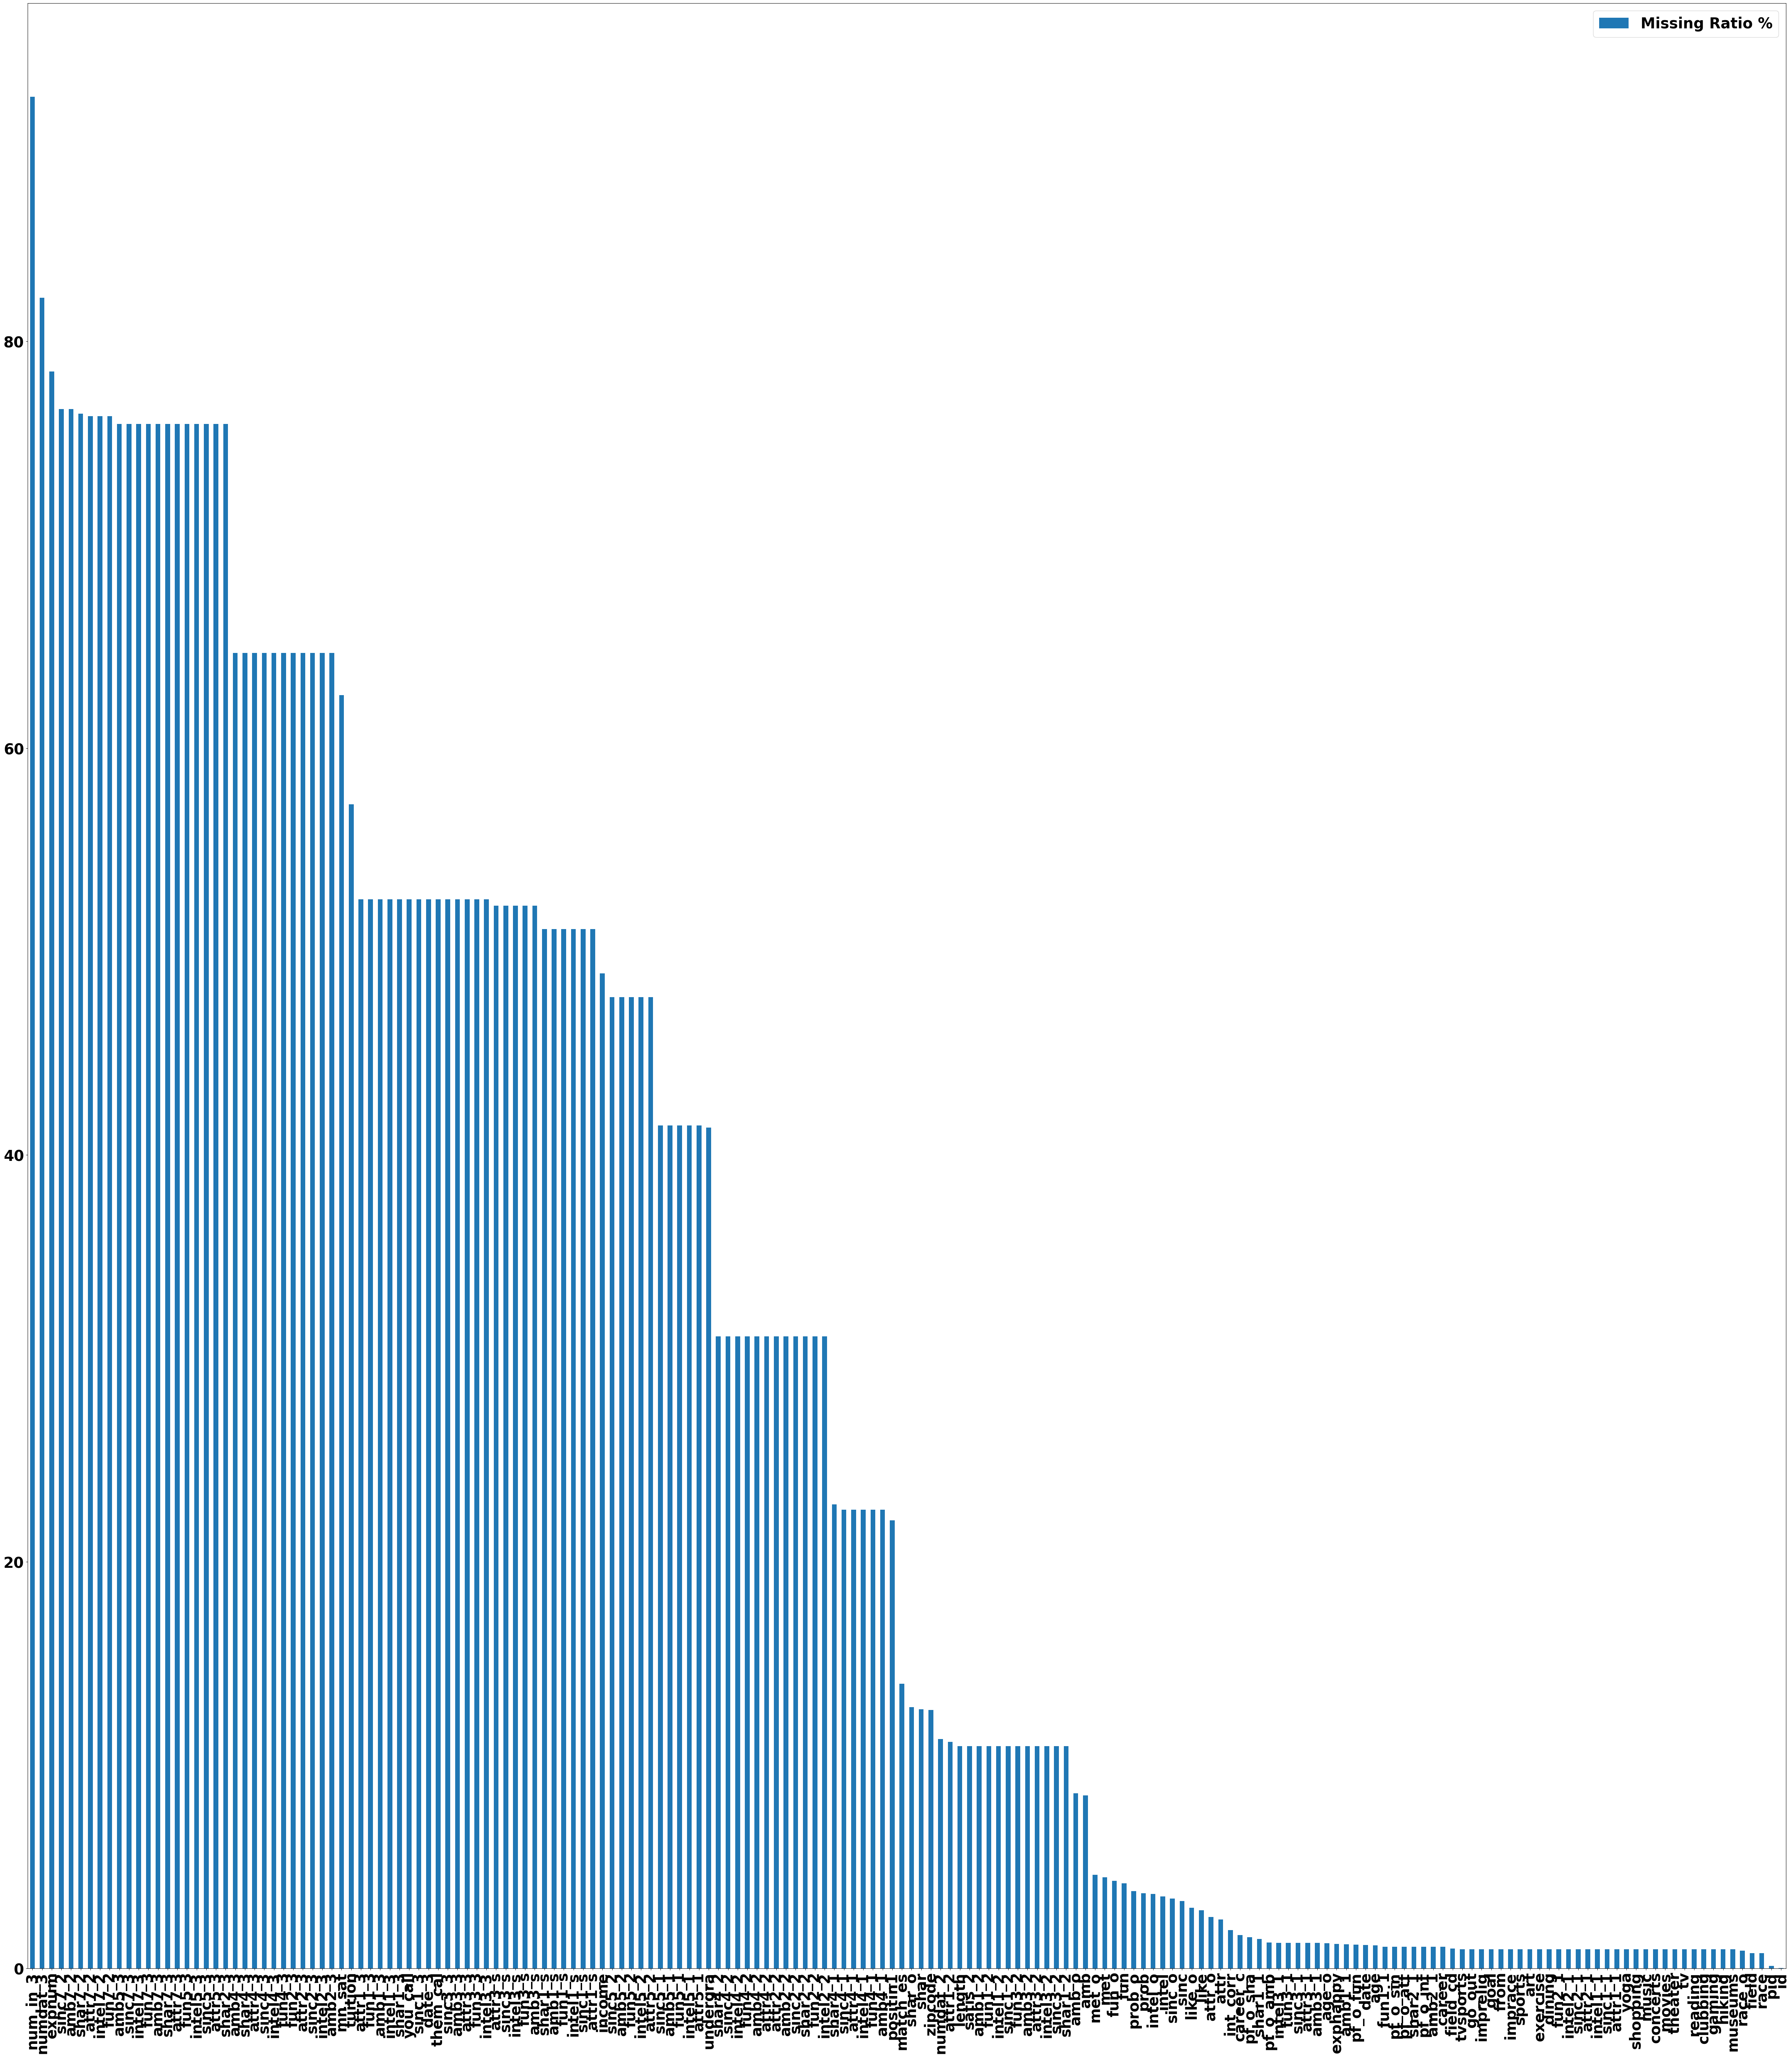

In [50]:
#Plotting the ratio of NaN values for each column

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        #plt.rc('xtick', labelsize=20) 
        #plt.rc('ytick', labelsize=20) 
        #plt.axvline(x=50)
        plt.show()
    else:
        print('No NaNs found')
plot_nas(df)

font = {'weight' : 'bold','size'   : 30}

plt.rc('font', **font)
plot_width, plot_height = (64,72)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

Let's remove the columns with more than 40% NaN values

In [51]:
#Filtering on columns with less than 40% of NaN values
df = df.loc[:, df.isnull().mean() < .4] 
df.isnull().sum()

iid           0
id            1
gender        0
idg           0
condtn        0
           ... 
attr3_2     915
sinc3_2     915
intel3_2    915
fun3_2      915
amb3_2      915
Length: 124, dtype: int64

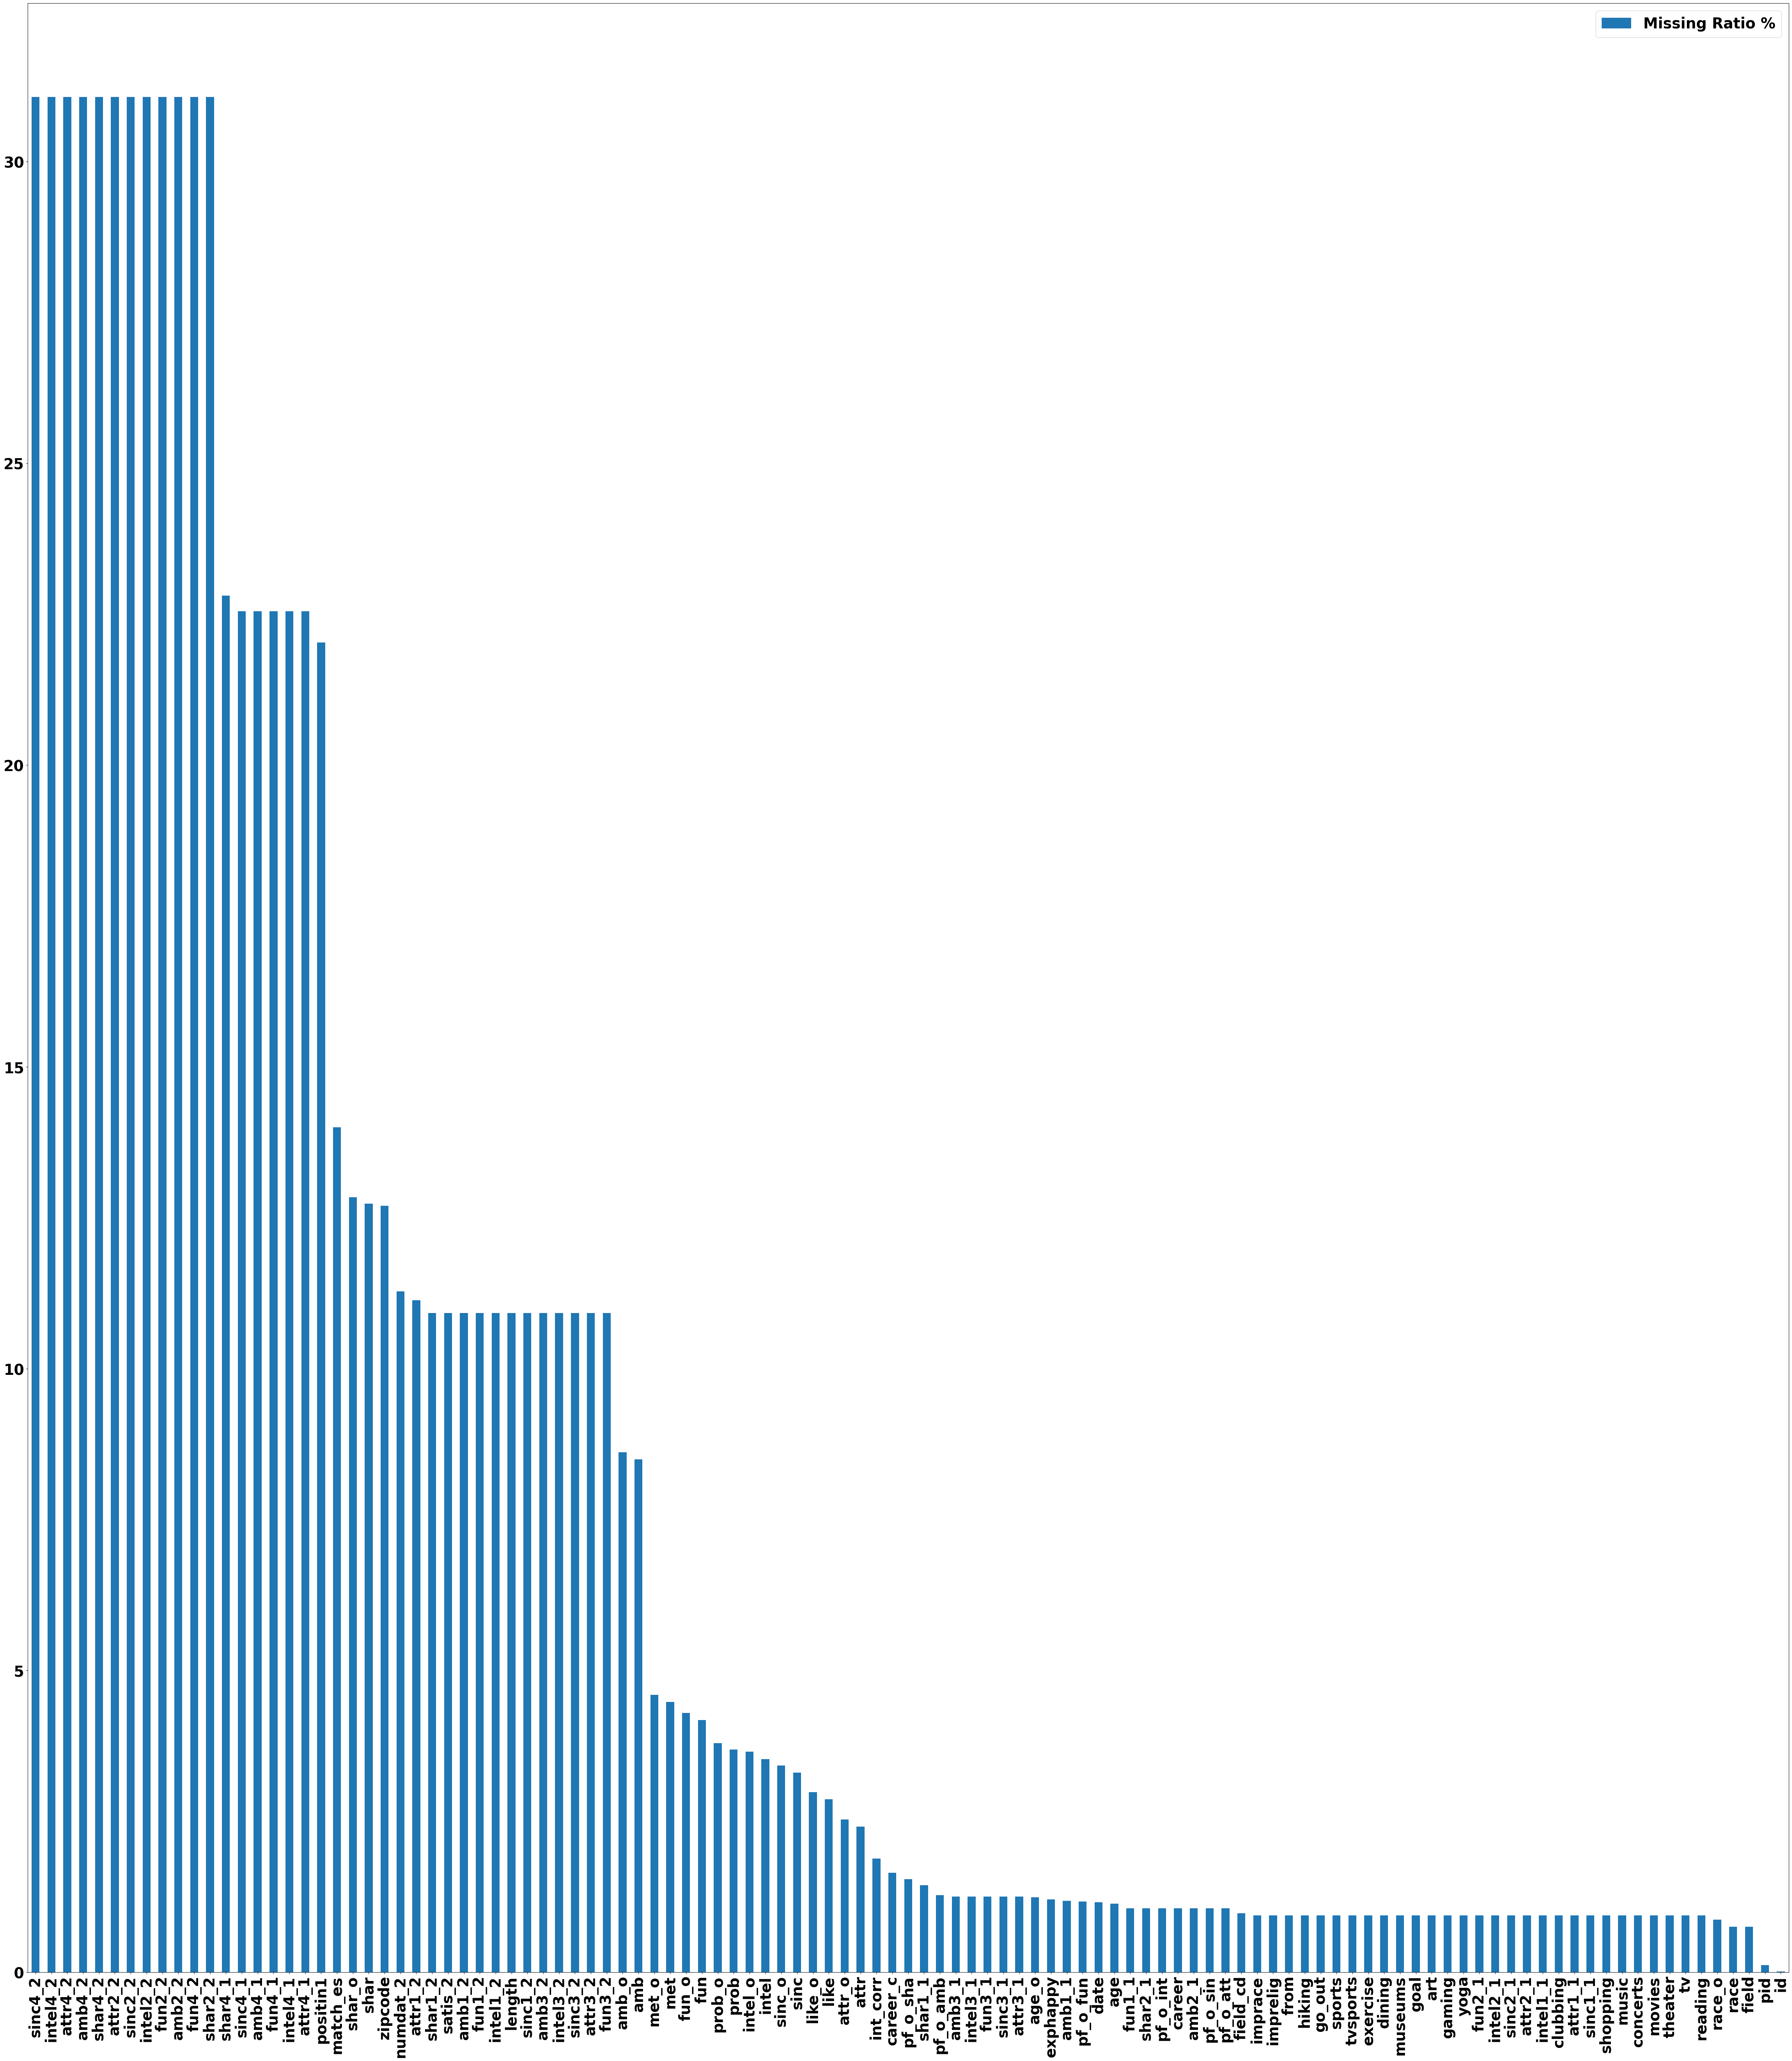

In [52]:
plot_nas(df)

In [53]:
#df = df.dropna()
df.shape

(8378, 124)

In [54]:
#correlation = df.corr()
#correlation

In [55]:
#sns.heatmap(correlation, annot=False)

In [56]:
#abs(correlation['match']).sort_values(ascending = False)

In [57]:
df.nunique()

iid         551
id           22
gender        2
idg          44
condtn        2
           ... 
attr3_2       9
sinc3_2       9
intel3_2      7
fun3_2       10
amb3_2        9
Length: 124, dtype: int64

In [58]:
df.match.value_counts()
#1380 matchs

0    6998
1    1380
Name: match, dtype: int64

In [59]:
#df_matchs = df[(df.match == 1)]
#df_matchs.groupby(by='wave')
#df_matchs

In [60]:
#df_matchs = df_matchs[(df_matchs.pid.isin(df_matchs.iid))]
#df_matchs
#344 common matchs => 172 potential second dates
#df_matchs.to_csv('matchs.csv')
#df.Modified.where(df.Status.isin(['Finished','Cancelled']),'',inplace=True)

In [61]:
#df_matchs[(df_matchs.wave == 1)]

Thanks to the former table, we can see that during the first wave, we could have 124/2 = 62 second dates (A match for both partners)
1380 rows in total during the whole experience : 1380/2 (2 partners) = 690 potential second dates !

In [62]:
#It's almost 50/50 between Female and Male
df['gender'].replace(0, 'Female',inplace=True)
df['gender'].replace(1, 'Male',inplace=True)

fig = px.pie(df, names='gender')
fig.show()

In [63]:
#Match numbers by gender
fig2 = px.histogram(df, x="gender", color="dec")
fig2.show()

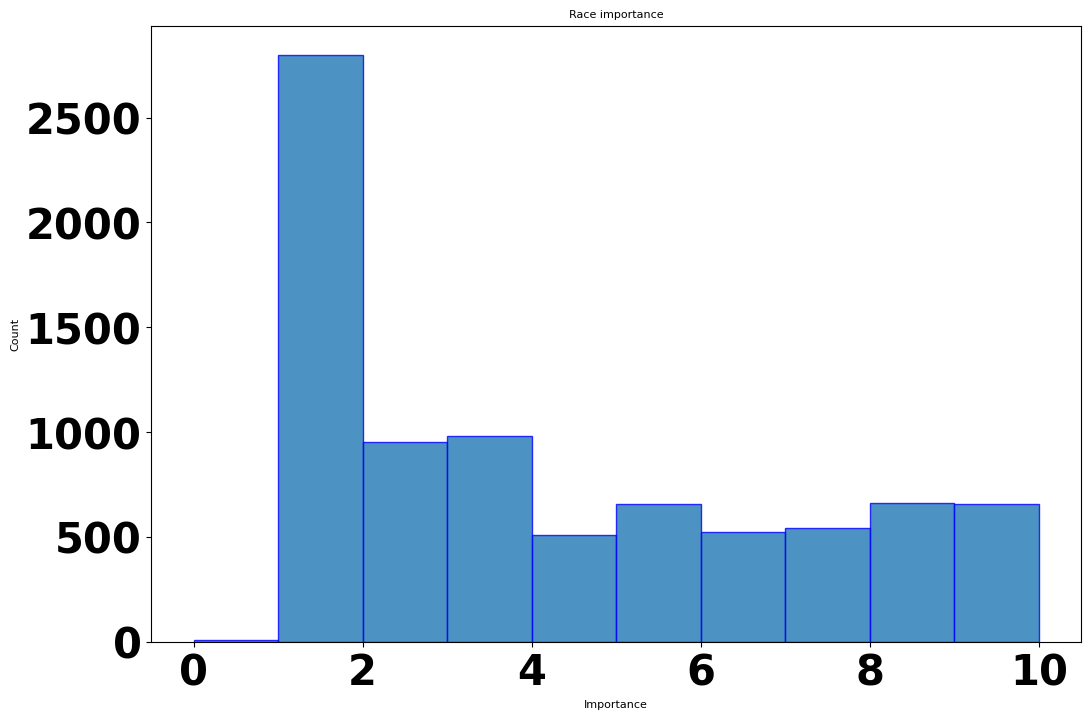

In [64]:
ax = df.imprace.hist(bins=10, figsize=(12,8), edgecolor='blue', alpha=0.8)
ax.set_title('Race importance', fontsize=8)
ax.set_xlabel('Importance',fontsize=8)
ax.set_ylabel('Count', fontsize=8)
ax.grid(False)

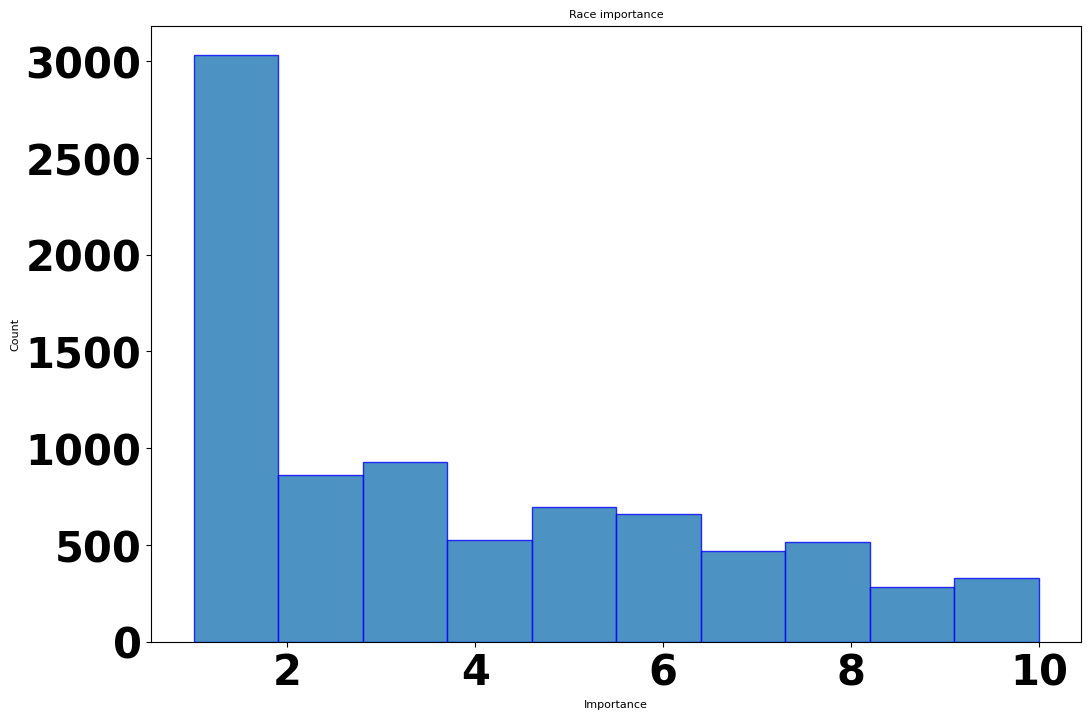

In [75]:
ax = df.imprelig.hist(bins=10, figsize=(12,8), edgecolor='blue', alpha=0.8)
ax.set_title('Race importance', fontsize=8)
ax.set_xlabel('Importance',fontsize=8)
ax.set_ylabel('Count', fontsize=8)
ax.grid(False)

In [65]:
#Split now the dataframe per gender

female = df["gender"] == 'Female'
male = df["gender"] == 'Male'

females = df[female]
males = df[male]

#females



In [67]:
interests = df[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractiveness','Sincereness','Intelligence','Fun','Ambition','Shared Interests']
interests.columns = cols

interests

,Attractiveness,Sincereness,Intelligence,Fun,Ambition,Shared Interests
gender,,,,,,
Female,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
Male,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


In [69]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(y=interests.iloc[0], x=interests.columns.values, name='Females'))
fig.add_trace(go.Bar(y=interests.iloc[1], x=interests.columns.values, name='Males'))

fig.show()

In [71]:
partner_interest = df[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
cols = ['Attractiveness','Sincereness','Intelligence','Fun','Ambition','Shared Interests']
partner_interest.columns = cols

partner_interest

,Attractiveness,Sincereness,Intelligence,Fun,Ambition,Shared Interests
gender,,,,,,
Female,35.694349,11.343646,12.532022,18.733510,9.230638,12.645113
Male,25.092631,15.181078,16.279633,18.115379,14.234815,11.071924


In [72]:
fig = go.Figure()
fig.add_trace(go.Bar(y=partner_interest.iloc[0], x=partner_interest.columns.values, name='Females'))
fig.add_trace(go.Bar(y=partner_interest.iloc[1], x=partner_interest.columns.values, name='Males'))

fig.show()